In [31]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np
import imageio
import os 

In [32]:
paths = ['./images/', './gif/']
if not os.path.exists(paths[0]) or not os.path.exists(paths[1]):
  for path in paths:
    os.mkdir(path)

#### Auxiliary functions

In [33]:
def read_file(path, file_name):
  file = os.path.join(path, file_name)
  data = pd.read_csv(file, low_memory=False)
  return data

def graphic_loss(cost, iter):
  plt.plot(iter, cost)
  plt.xlabel('Interations')
  plt.ylabel('Cost')
  plt.show()

def graphic_setting(X, y, predict, cost,iter, path, weights):
  w, b = weights

  model_txt = f'model = {w.item():.2f}x + {b.item():.2f}'
  cost_txt = f'cost = {cost:.8f}'

  plt.plot(X, y, 'x')
  plt.plot(X, predict, 'r')
  plt.text(-1.6, 0.9, cost_txt, fontsize= 10)
  plt.text(-1.6, 1.3, model_txt, fontsize=10)
  plt.text(-1.6, 1.7, 'epoch = ' + str(iter), fontsize = 10)
  plt.savefig(path+str(iter)+'.png')
  plt.close()

def create_gif(path):
  images = []
  file_path = sorted(os.listdir(path), key=lambda fname: int(fname.split('.')[0]))
  for file_name in file_path:
    images.append(imageio.imread(path + file_name))
  imageio.mimsave(f'{paths[1]}learning.gif', images)


##### Formulas

$predict = f_{w,b} = wx + b$

$Mean Square Error = 1/m\sum_{i=1}^m (y_i - (wx_i + b))²$

$ dj/dw = 1/m\sum_{i=1}^m 2x_i(y_i - (wx_i + b))$

$ dj/db = 1/m\sum_{i=1}^m 2(y_i - (wx_i + b))$

In [34]:
class LinearRegression:
  def __init__(self, X: np.ndarray, y: np.ndarray, epochs: int, learning_rate: float) -> None:
    self.X, self.y, self.lr = X, y, learning_rate
    
    self.n_samples, self.n_features = self.X.shape
    self.weight = np.zeros((self.n_features, 1))
    self.bias = 0
    self.epochs = epochs

  def predict(self, X: np.ndarray):
    return np.dot(X, self.weight) + self.bias

  def gradient(self, predict: np.ndarray):
    error = predict - self.y
    dw = (1/self.n_features) * np.dot(self.X.T, error)
    db = (1/self.n_features) * np.sum(error)
    return dw, db
  
  def MSE(self, predict: np.ndarray):
    return np.sum((predict - self.y)**2) / self.n_samples

  def gradient_descent(self):
    p_bar = tqdm(range(self.epochs), desc='Training time')
    total_cost = []
    
    for iter in p_bar:
      p_bar.set_postfix_str(f'Epoch: {iter}')
      prediction = self.predict(self.X)
      dw, db = self.gradient(prediction)
      self.weight = self.weight - self.lr * dw
      self.bias = self.bias - self.lr * db
      
      cost = self.MSE(prediction)
      total_cost.append(cost)

      graphic_setting(self.X, self.y, prediction, cost, iter, paths[0], [self.weight, self.bias])
    graphic_loss(total_cost, range(self.epochs))
    create_gif(paths[0])

#### Data normalization and visualization

In [35]:
data_path = './data/'
file_name = 'student_scores.csv' 
data = read_file(data_path, file_name)
data.columns = ['X', 'y']
display(data.head())

,X,y
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [36]:
X, y =  data.X.values.reshape(-1,1), data.y.values.reshape(-1,1)
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training time: 100%|██████████| 100/100 [00:10<00:00,  9.88it/s, Epoch: 99]


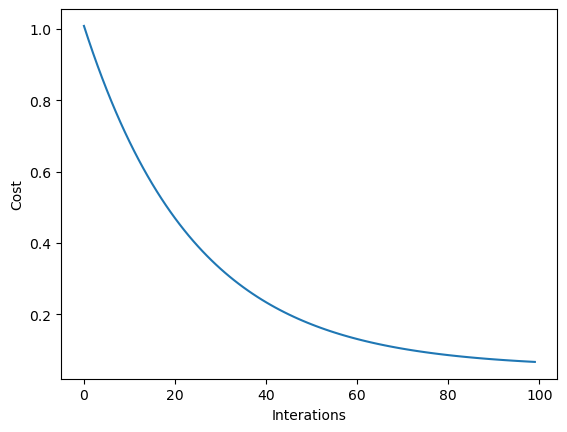

/tmp/ipykernel_46433/2184338704.py:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(path + file_name))


In [37]:
model = LinearRegression(X_train, y_train, 100, 0.001)
model.gradient_descent()

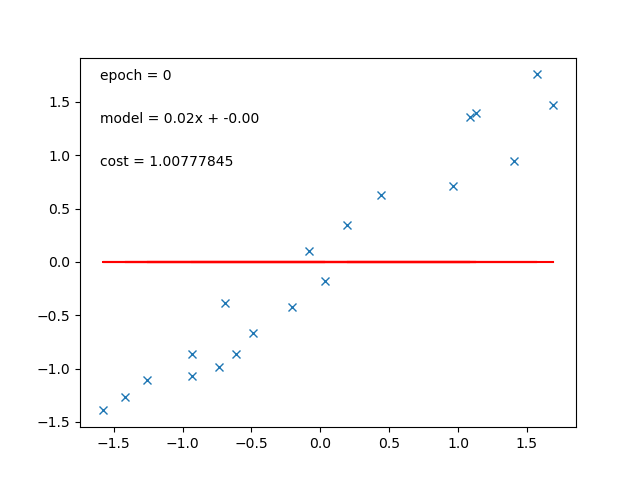

In [38]:
from IPython.display import Image
Image(filename="./gif/learning.gif")